In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-food-101/indian_food.csv


In [2]:
food_data = pd.read_csv('../input/indian-food-101/indian_food.csv')
food_data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [3]:
food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [4]:
food_data[food_data['region'].isnull()]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
110,Panjeeri,"Whole wheat flour, musk melon seeds, poppy see...",vegetarian,10,25,sweet,dessert,Uttar Pradesh,NaN


In [5]:
#since, the missing region value is from UP, so replacing it with North
food_data.region.fillna('North',inplace=True)

In [6]:
#let's add a column as total time which will be sum of both
# preparation and cooking tim

In [7]:
food_data['Total time']  = food_data['prep_time'] + food_data['cook_time']

In [8]:
food_data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,Total time
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,70
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,110
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North,75
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West,45
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East,55


<AxesSubplot:xlabel='diet', ylabel='count'>

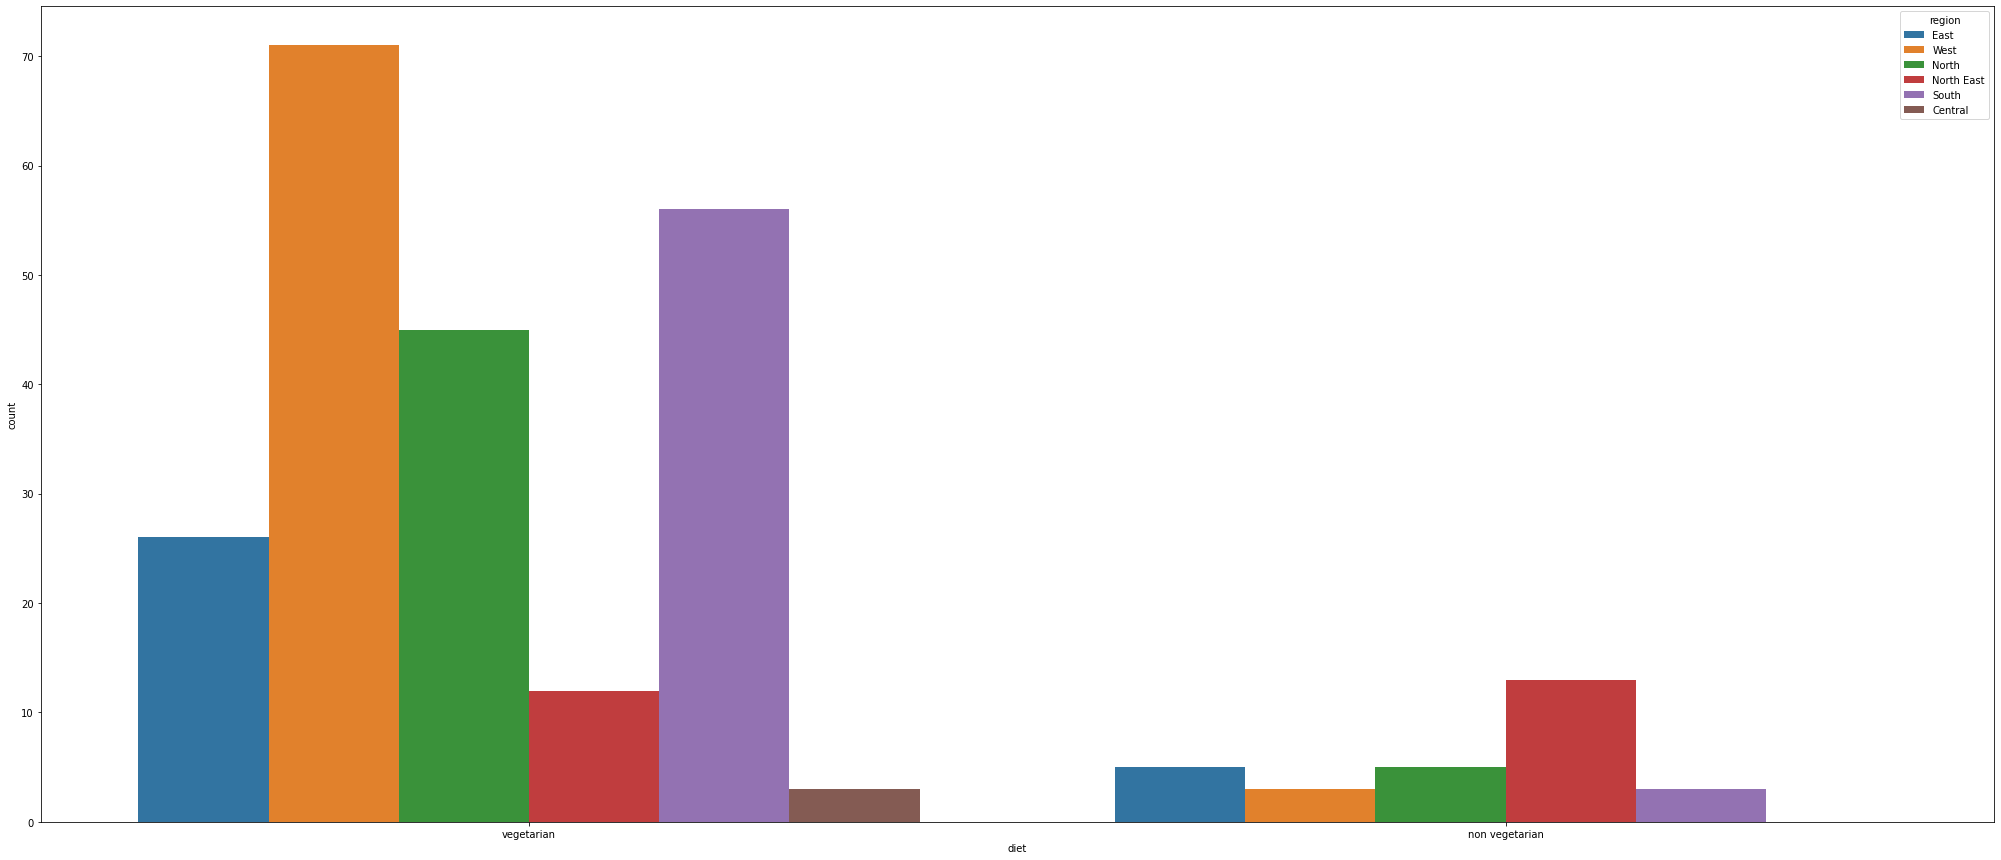

In [9]:
plt.figure(figsize=(35,15))
sns.countplot(x = 'diet',data = food_data[food_data.region!='-1'], hue = 'region')

<AxesSubplot:xlabel='Total time', ylabel='Count'>

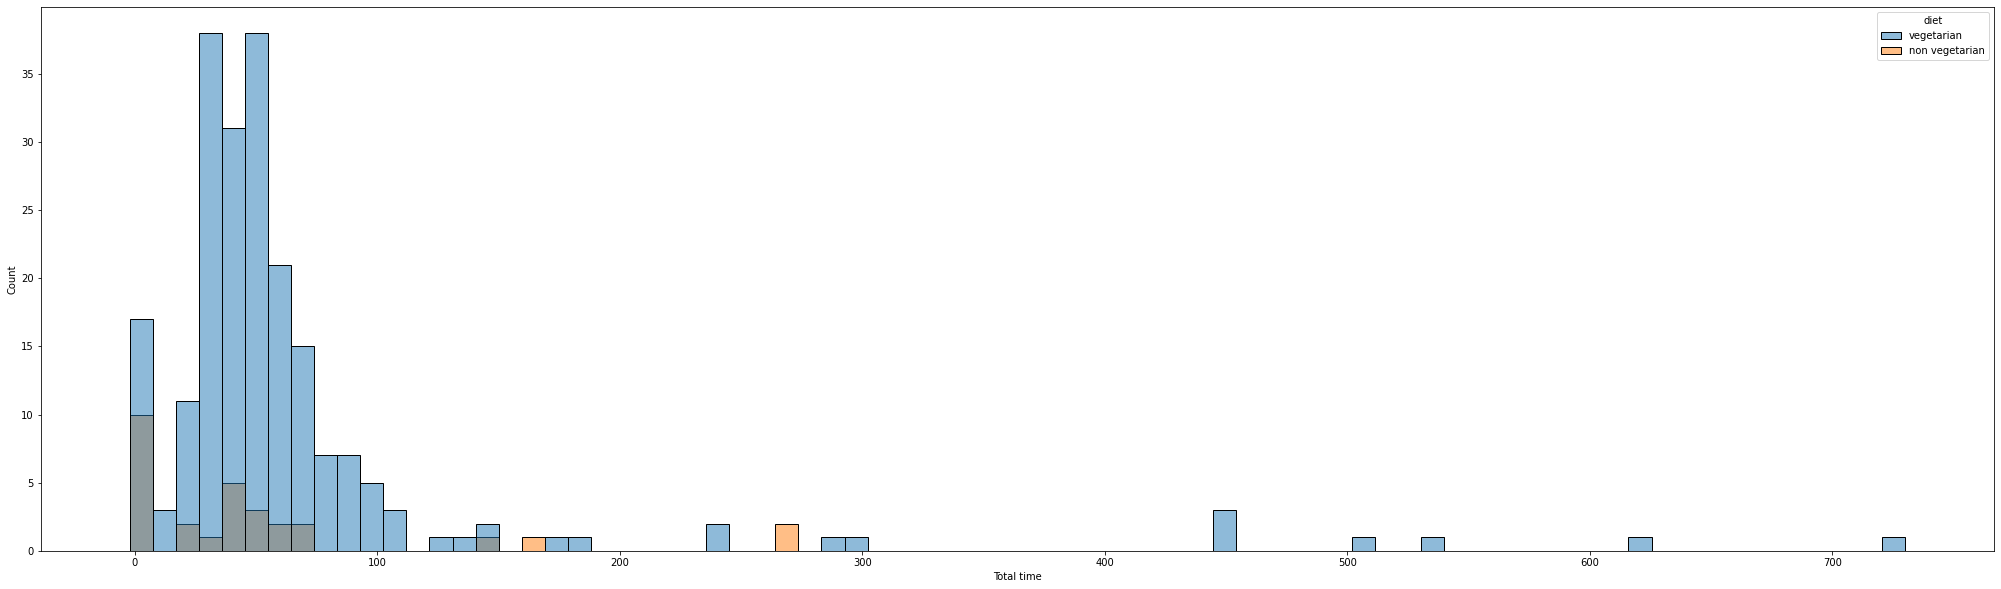

In [10]:
plt.figure(figsize=(35,10))
sns.histplot(x = 'Total time', data = food_data[food_data['region'] != '-1'],hue = 'diet')

<AxesSubplot:xlabel='Total time', ylabel='Count'>

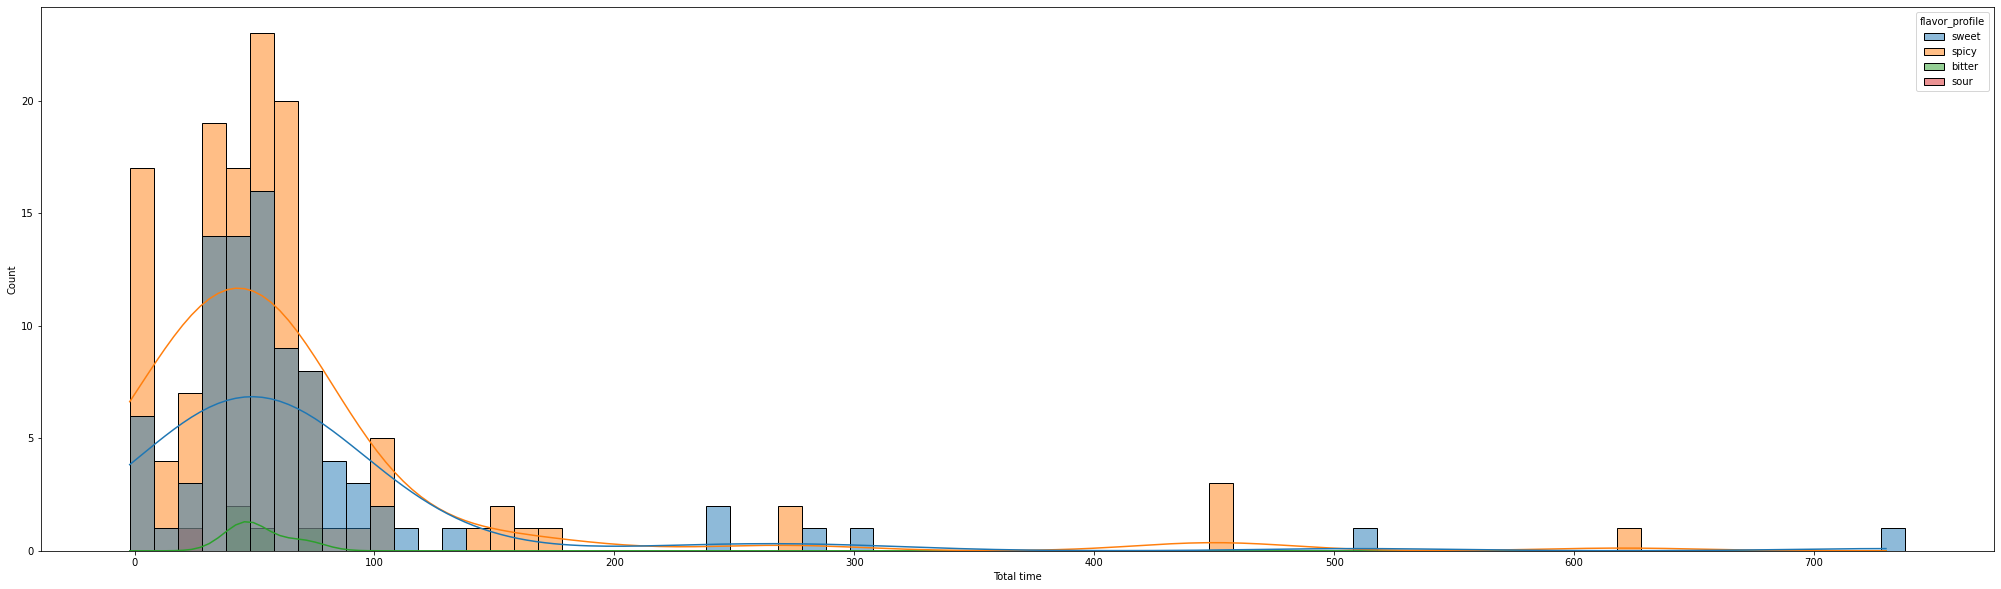

In [11]:
plt.figure(figsize=(35,10))
sns.histplot(x = 'Total time', data = food_data[food_data['flavor_profile'] != '-1'],hue = 'flavor_profile',kde = True,binwidth=10)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Total time', ylabel='Density'>

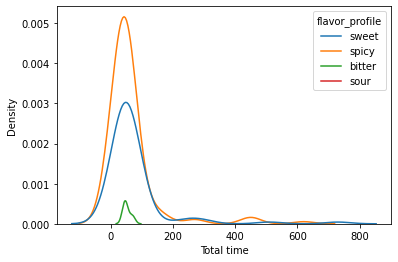

In [12]:
sns.kdeplot(x = 'Total time', data = food_data[food_data['flavor_profile'] != '-1'],hue = 'flavor_profile')

In [13]:
food_data[food_data.flavor_profile!='-1'].groupby('flavor_profile').agg(['mean',np.median])

prep_time         cook_time        Total time       
                     mean median       mean median       mean median
flavor_profile                                                      
bitter          15.000000   15.0  37.500000   35.0  52.500000   47.5
sour            10.000000   10.0  10.000000   10.0  20.000000   20.0
spicy           32.428571   10.0  30.872180   30.0  63.300752   50.0
sweet           28.397727   10.0  44.136364   30.0  72.534091   50.0

In [14]:
#above visualization proves that bitter, spicy and sweet dishes mostly have almost similar preparation time
#with some sweet and spicy dishes can take very long to prepare

In [15]:
#let's analyze north india 

In [16]:
north_food = food_data[food_data['region']=='North'].copy()  #deep copying so as to safeguard original data

In [17]:
pd.set_option('max_colwidth', 400)
north_food.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,Total time
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North,75
6,Jalebi,"Maida, corn flour, baking soda, vinegar, curd, water, turmeric, saffron, cardamom",vegetarian,10,50,sweet,dessert,Uttar Pradesh,North,60
11,Lassi,"Yogurt, milk, nuts, sugar",vegetarian,5,5,sweet,dessert,Punjab,North,10
13,Petha,"Firm white pumpkin, sugar, kitchen lime, alum powder",vegetarian,10,30,sweet,dessert,Uttar Pradesh,North,40
15,Rabri,"Condensed milk, sugar, spices, nuts",vegetarian,10,45,sweet,dessert,Uttar Pradesh,North,55


In [18]:
#actually nothing to analyze in the dataset

In [19]:
#dish_to_find = input("Please enter the dish you want to look at the details:")

In [20]:
#for dishes in food_data.name:
    #if dish_to_find.lower() in dishes.lower():
        #print(food_data[food_data.name == dishes])

In [21]:
north_food[north_food['Total time']>0].sort_values('Total time').head(5) #top -5 fastest cooking dishes in north

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,Total time
11,Lassi,"Yogurt, milk, nuts, sugar",vegetarian,5,5,sweet,dessert,Punjab,North,10
69,Aloo tikki,"Rice flour, potato, bread crumbs, garam masala, salt",vegetarian,5,20,spicy,main course,Punjab,North,25
17,Singori,"Khoa, coconut, molu leaf",vegetarian,10,20,sweet,dessert,Uttarakhand,North,30
68,Aloo gobi,"Cauliflower, potato, garam masala, turmeric, curry leaves",vegetarian,10,20,spicy,main course,Punjab,North,30
118,Sattu ki roti,"Sattu, atta, dough, filling, mustard oil",vegetarian,10,20,spicy,main course,Bihar,North,30


<AxesSubplot:xlabel='Total time', ylabel='Count'>

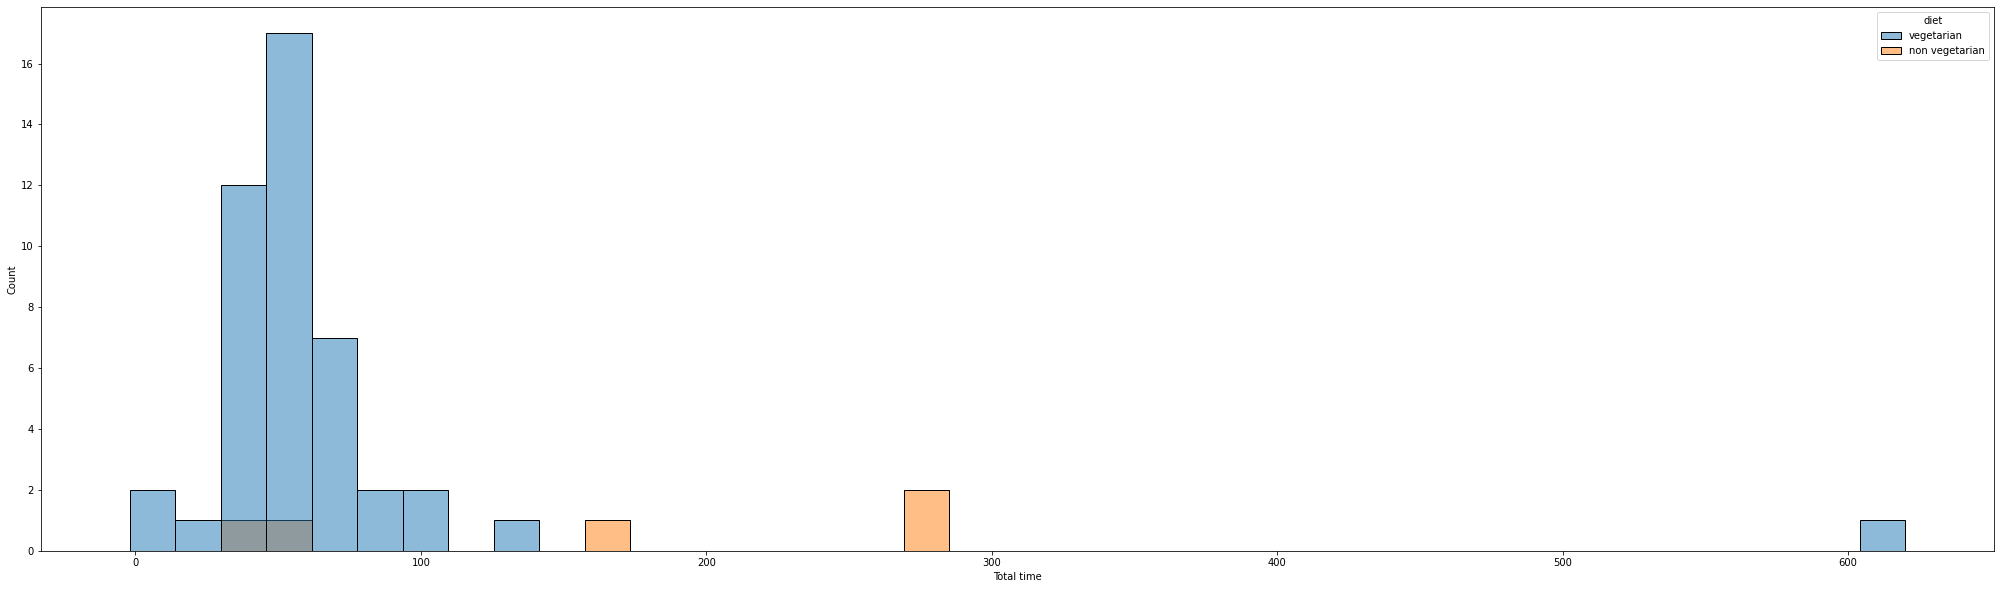

In [22]:
plt.figure(figsize=(35,10))
sns.histplot(x = 'Total time', data = food_data[food_data['region'] == 'North'],hue = 'diet')

In [23]:
#in north india, mostly veg dishes are prepared within 100min(<2hr)

<AxesSubplot:xlabel='Total time', ylabel='Density'>

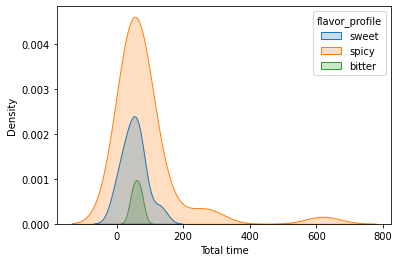

In [24]:
sns.kdeplot(x = 'Total time', data = north_food[north_food.flavor_profile!='-1'],hue = 'flavor_profile',shade=True)

In [25]:
#In north india, the preparation time for sweet, spicy and bitter dishes is mostly same, with some spicy dishes can take very long
#time to prepare